# Diamond Price Prediction..

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline      

In [2]:
#Fetching the data

df=pd.read_csv('diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Defining the columns of dataset

In [3]:
''' carat-->Diamond weight in carat
cut-->Diamond cutting quality from worst to beat(Fair,Good,Very Good,Premium,Ideal)
color-->diamond color from j(worst) to d(best)
clarity-->Diamond clarity from worst to best(I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)
depth-->Percentage depth(mean(x,y))
table-->the width of widest point
price-->Diamond price (target variable/dependent variable)
x-->length in mm
y-->width in mm
z-->depth in mm '''

' carat-->Diamond weight in carat\ncut-->Diamond cutting quality from worst to beat(Fair,Good,Very Good,Premium,Ideal)\ncolor-->diamond color from j(worst) to d(best)\nclarity-->Diamond clarity from worst to best(I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)\ndepth-->Percentage depth(mean(x,y))\ntable-->the width of widest point\nprice-->Diamond price (target variable/dependent variable)\nx-->length in mm\ny-->width in mm\nz-->depth in mm '

In [4]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [5]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [6]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

### To show Info() of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [8]:
''' description---->
this dataset have 50000 rows (0 to 49999)..
this dataset have 10 columns(0 to 9)..
data types of the columns are--float,int,object..
Memory use by dataset is 3.8Mb
'''

' description---->\nthis dataset have 50000 rows (0 to 49999)..\nthis dataset have 10 columns(0 to 9)..\ndata types of the columns are--float,int,object..\nMemory use by dataset is 3.8Mb\n'

### to show describe function

In [9]:
df.describe()  # df.describe().T used to show the transpose

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
''' Description--->
count-->count the number of value 
mean-->mean of price is 3944.805440
std-->standard deviation of price is 3997.938105
min-->minimum value of price is 326.0
max-->maximum value of price is 18823.0
25 percent of the price is 951.0
50 percent of price is 2410.0
75 percent of price is 5351.0'''

' Description--->\ncount-->count the number of value \nmean-->mean of price is 3944.805440\nstd-->standard deviation of price is 3997.938105\nmin-->minimum value of price is 326.0\nmax-->maximum value of price is 18823.0\n25 percent of the price is 951.0\n50 percent of price is 2410.0\n75 percent of price is 5351.0'

In [11]:
# To show all the columns in describe function
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,50000.000000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,19938,10452,12115,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.799444,NaN,NaN,NaN,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,NaN,NaN,NaN,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000


In [12]:
'''In this dataset it is noticed that the minimum value of x,y,z
columns are 0 it indicates that there are faulty values in data.
so we need to filter out those faulty data points.
'''

'In this dataset it is noticed that the minimum value of x,y,z\ncolumns are 0 it indicates that there are faulty values in data.\nso we need to filter out those faulty data points.\n'

In [13]:
df=df.drop(df[df['x']==0].index)
df=df.drop(df[df['y']==0].index)
df=df.drop(df[df['z']==0].index)
df.shape

(49983, 10)

# Removing the Outliers

<AxesSubplot:ylabel='x'>

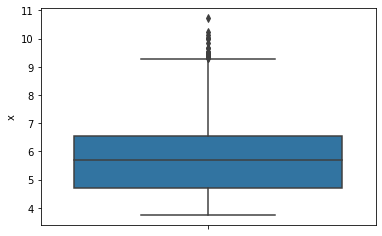

In [14]:
sns.boxplot(y=df['x'])

<AxesSubplot:ylabel='x'>

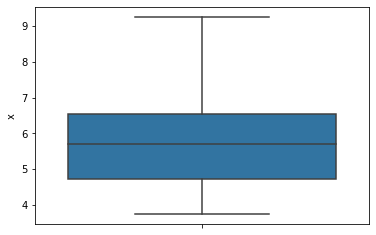

In [15]:
Q1 = df['x'].quantile(0.25)
Q3 = df['x'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['x'] > lower_bound) & (df['x'] < upper_bound)]

sns.boxplot(y=df['x'])

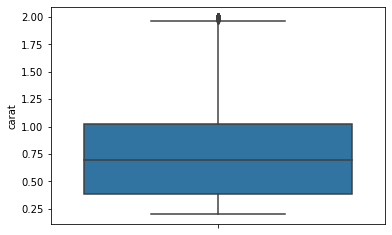

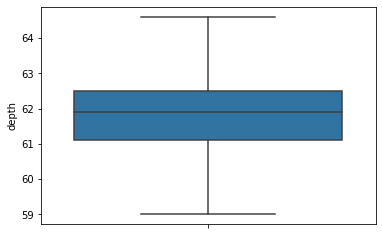

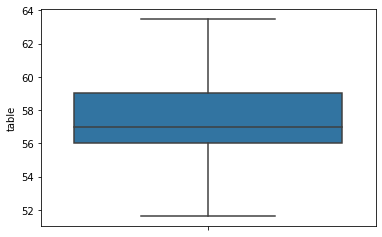

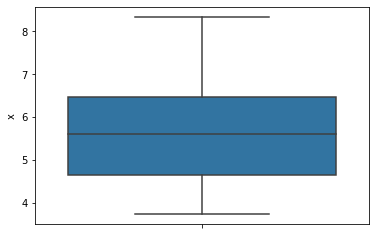

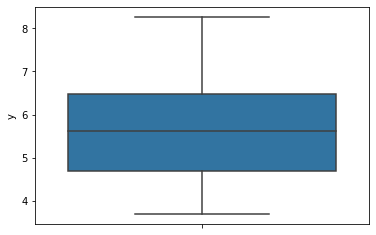

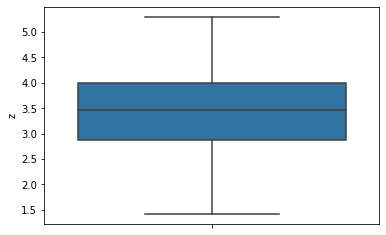

In [16]:
cols=['carat','depth','table','x','y','z']
for i in cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    plt.figure()
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

    sns.boxplot(y=df[i])

### Checking for duplicate value

In [17]:
df.duplicated().sum()

97

In [18]:
# remove duplicate rows
df=df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape  #show the rows and columns of dataset

(45207, 10)

### Data cleaning

In [21]:
# Treating null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [22]:
# There is no null values

### Encoding

In [23]:
df['cut']=df['cut'].replace({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})

In [24]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [25]:
df['color']=df['color'].replace({'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6})

In [26]:
df['clarity']=df['clarity'].replace({"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7})

In [27]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48


# Finding the correlation

In [28]:
df['carat'].corr(df['cut'])

-0.11524226649881242

In [29]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.115242,-0.233252,-0.311634,0.032866,0.181783,0.909509,0.985126,0.984490,0.984061
cut,-0.115242,1.000000,0.011606,0.163414,-0.283944,-0.405862,-0.049501,-0.098541,-0.102343,-0.127693
color,-0.233252,0.011606,1.000000,-0.055342,-0.043584,-0.019767,-0.097675,-0.217437,-0.217491,-0.220582
clarity,-0.311634,0.163414,-0.055342,1.000000,-0.071576,-0.153276,-0.080822,-0.332623,-0.327691,-0.335532
depth,0.032866,-0.283944,-0.043584,-0.071576,1.000000,-0.228516,-0.001063,-0.009775,-0.011487,0.087137
table,0.181783,-0.405862,-0.019767,-0.153276,-0.228516,1.000000,0.123017,0.182893,0.177740,0.158456
price,0.909509,-0.049501,-0.097675,-0.080822,-0.001063,0.123017,1.000000,0.875382,0.876698,0.872048
x,0.985126,-0.098541,-0.217437,-0.332623,-0.009775,0.182893,0.875382,1.000000,0.998696,0.994036
y,0.984490,-0.102343,-0.217491,-0.327691,-0.011487,0.177740,0.876698,0.998696,1.000000,0.993895
z,0.984061,-0.127693,-0.220582,-0.335532,0.087137,0.158456,0.872048,0.994036,0.993895,1.000000


In [30]:
''' correlation --> It shows that how two variables are linearly related.'''

' correlation --> It shows that how two variables are linearly related.'

# Pairplot

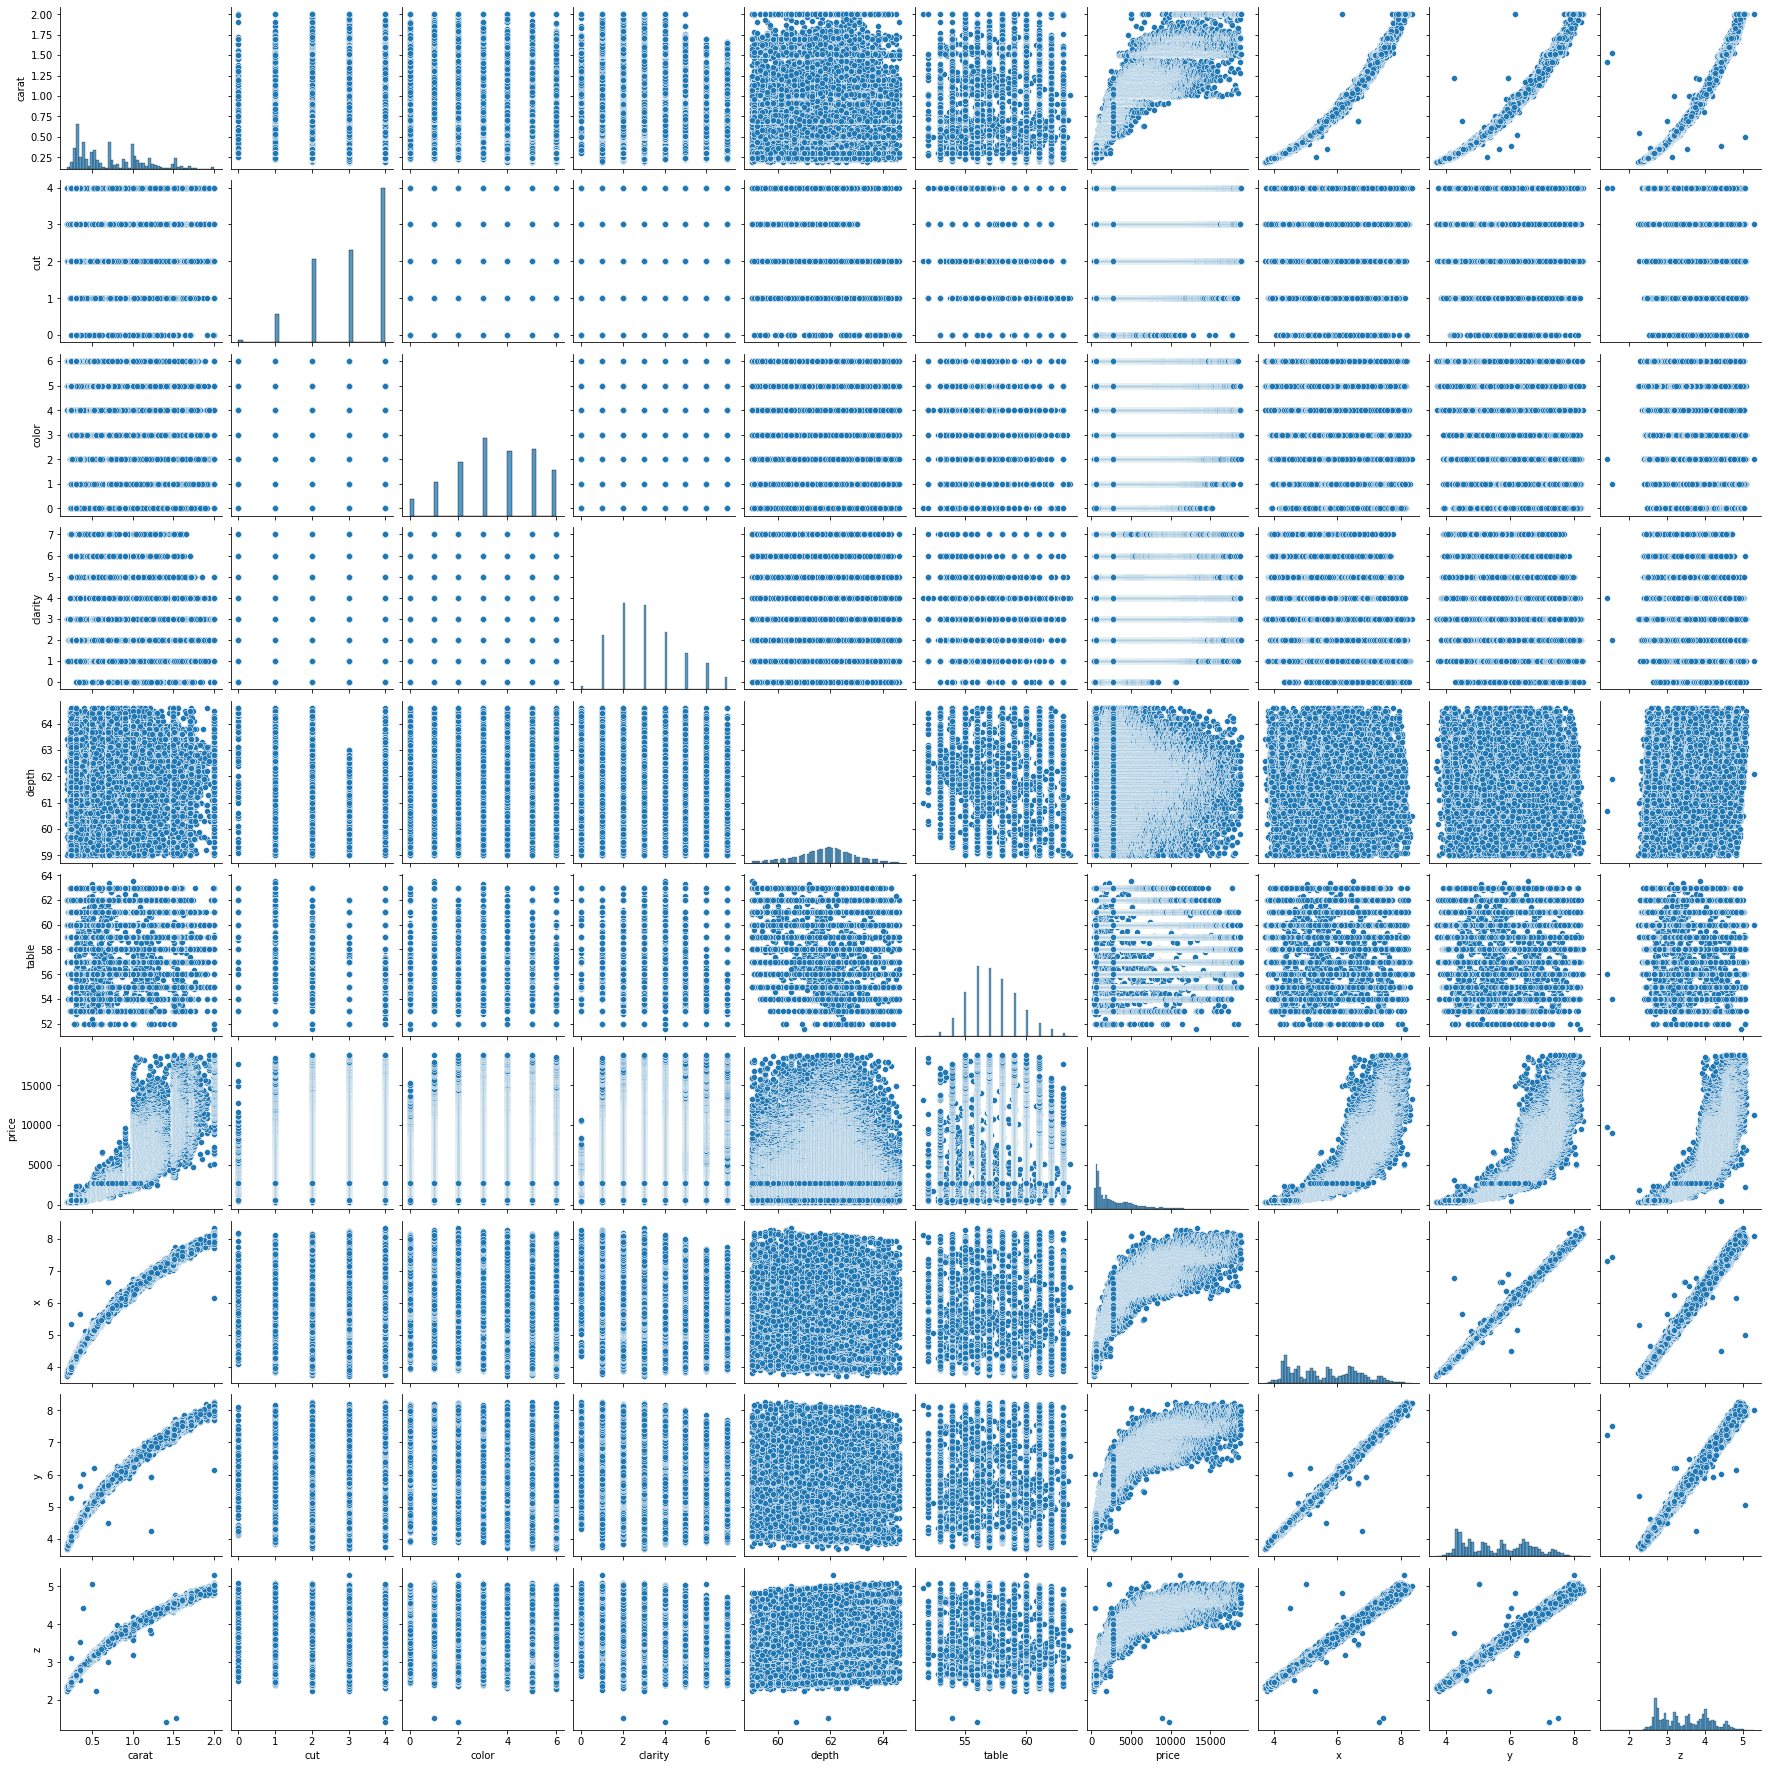

In [31]:
sns.pairplot(df)


# Heatmap

<AxesSubplot:>

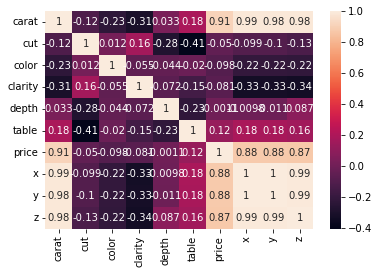

In [32]:
corrmat=df.corr()
sns.heatmap(corrmat,annot=True)

# Data modeling

In [33]:
X= df.drop(["price"],axis =1).values
y= df["price"].values


In [34]:
X

array([[0.23, 4.  , 5.  , ..., 3.95, 3.98, 2.43],
       [0.21, 3.  , 5.  , ..., 3.89, 3.84, 2.31],
       [0.29, 3.  , 1.  , ..., 4.2 , 4.23, 2.63],
       ...,
       [0.7 , 2.  , 6.  , ..., 5.66, 5.68, 3.56],
       [0.86, 3.  , 2.  , ..., 6.15, 6.12, 3.74],
       [0.75, 4.  , 6.  , ..., 5.83, 5.87, 3.64]])

In [35]:
y

array([ 326,  326,  334, ..., 2757, 2757, 2757], dtype=int64)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [38]:
X_train

array([[1.11, 3.  , 2.  , ..., 6.7 , 6.64, 4.03],
       [1.03, 3.  , 3.  , ..., 6.48, 6.41, 4.  ],
       [0.7 , 2.  , 3.  , ..., 5.74, 5.8 , 3.5 ],
       ...,
       [0.9 , 2.  , 2.  , ..., 6.08, 6.11, 3.85],
       [0.35, 4.  , 1.  , ..., 4.52, 4.54, 2.83],
       [0.52, 4.  , 0.  , ..., 5.15, 5.18, 3.2 ]])

In [39]:
X_test

array([[0.3 , 1.  , 2.  , ..., 4.22, 4.25, 2.68],
       [0.55, 3.  , 4.  , ..., 5.22, 5.26, 3.26],
       [0.34, 3.  , 5.  , ..., 4.59, 4.55, 2.71],
       ...,
       [0.35, 4.  , 3.  , ..., 4.56, 4.59, 2.79],
       [0.51, 2.  , 6.  , ..., 5.08, 5.12, 3.16],
       [0.55, 4.  , 5.  , ..., 5.26, 5.21, 3.25]])

# Feature Scaling To Get All Columns In Same Scale/Range

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [41]:
X_train=sc.fit_transform(X_train)


In [42]:
X_test=sc.transform(X_test)

In [43]:
X_train

array([[ 0.91756116, -0.02834567, -0.87464766, ...,  1.05332824,
         0.99550518,  0.87640038],
       [ 0.71842367, -0.02834567, -0.27737363, ...,  0.8391397 ,
         0.7703125 ,  0.82917609],
       [-0.10301848, -1.01880097, -0.27737363, ...,  0.11868736,
         0.17306235,  0.04210468],
       ...,
       [ 0.39482525, -1.01880097, -0.87464766, ...,  0.44970601,
         0.47658292,  0.59305467],
       [-0.974245  ,  0.96210963, -1.47192169, ..., -1.06908541,
        -1.06060191, -1.01257102],
       [-0.55107783,  0.96210963, -2.06919571, ..., -0.45572734,
        -0.43397879, -0.43013817]])

## Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [45]:
reg.fit(X_train,y_train)

LinearRegression()

In [46]:
reg.coef_

array([ 5633.10949063,    69.05365019,   538.22160081,   759.47087076,
         -27.96889092,   -82.25955238, -2061.02457209,   978.4929528 ,
       -1071.58440572])

In [47]:
reg.intercept_

3522.5223558688535

In [48]:
y_pred=reg.predict(X_test)

In [49]:
y_pred

array([ 731.39330589, 1715.59221957,  214.6452473 , ..., 1640.06772287,
       2009.067223  , 1654.63815764])

## Evaluation

In [50]:
from sklearn import metrics

In [51]:
metrics.mean_squared_error(y_test,y_pred)

1115625.4052654707

In [52]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1056.2317005588645

In [53]:
metrics.r2_score(y_test,y_pred)

0.9075282963609094

In [55]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


# k nearest neighbor

In [56]:
from sklearn.neighbors import KNeighborsRegressor
reg_all = KNeighborsRegressor(n_neighbors = 8, metric = 'minkowski', p = 2)
reg_all.fit(X_train,y_train)
y_pred=reg_all.predict(X_test)

In [57]:
y_pred

array([ 758.875, 1741.375,  665.875, ...,  858.   , 1717.875, 1528.875])

In [58]:
metrics.mean_squared_error(y_test,y_pred)

339084.32454103074

In [59]:
metrics.r2_score(y_test,y_pred)

0.9718940559979825

# Random forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [61]:
y_pred

array([ 718.2, 1672.2,  675.1, ...,  997.9, 1683.8, 1705. ])

In [62]:
metrics.mean_squared_error(y_test,y_pred)

191281.57909417737

In [63]:
metrics.r2_score(y_test,y_pred)

0.9841450961853947

In [64]:
import joblib

In [65]:
joblib.dump(rf,open("price.pkl","wb"))